In [15]:
import snowflake.connector
from dotenv import load_dotenv
import os
import pandas as pd

In [16]:
# Load environment variables from a .env file
load_dotenv()

# Retrieve Snowflake connection details from environment variables
account = os.getenv('SNOWFLAKE_ACCOUNT')
user = os.getenv('SNOWFLAKE_USER')
password = os.getenv('SNOWFLAKE_PASSWORD')
database = os.getenv('SNOWFLAKE_JOBSDB')
schema = os.getenv('SNOWFLAKE_SCHEMA')
warehouse = os.getenv('SNOWFLAKE_WAREHOUSE')

In [26]:
def query_snowflake(query):
    try:
        # Establish connection to Snowflake
        conn = snowflake.connector.connect(
            account=account,
            user=user,
            password=password,
            database=database,
            schema=schema,
            warehouse=warehouse
        )
        
        # Execute the query
        cursor = conn.cursor()
        cursor.execute(query)
        
        # Fetch column names and results
        columns = [col[0] for col in cursor.description]
        results = cursor.fetchall()
        
        # Convert results to a Pandas DataFrame
        df = pd.DataFrame(results, columns=columns)
        
        # Close the connection
        cursor.close()
        conn.close()
        
        # Return the DataFrame
        return df
    except Exception as e:
        print(f"Error querying Snowflake: {e}")
        return None

# Example query
query = "SELECT * FROM JOBLISTINGS;"  # Replace with your table
result_df = query_snowflake(query)
result_df

,JOB_ID,SEARCH_QUERY,TITLE,COMPANY,LOCATION,DESCRIPTION,POSTED_AT,POSTED_DATE,APPLY_LINKS
0,f293dbca-fc03-4e88-a897-879c2bcbe78f,software engineer,Senior Software Engineer- NC,First Citizens Bank,North Carolina (+1 other),Overview\n\nThis is a remote role that may onl...,3 days ago,2024-11-21,First Citizens Careers - First Citizens Bank: ...
1,da083e45-59e7-4120-8204-cc6084e75660,software engineer,Software Engineer – Web Technology,FlexGen,"Durham, NC","About FlexGen\n\nBased in Durham, N.C., FlexGe...",None,None,LinkedIn: https://www.linkedin.com/jobs/view/s...
2,aa025655-9a8d-4949-951d-94967865de07,software engineer,Software Engineer,NetApp,"Durham, North Carolina",Job Summary\n\nWe are seeking a talented and m...,10 days ago,2024-11-14,NetApp Careers: https://careers.netapp.com/job...
3,e463bfb5-bf77-486a-9401-d29e138c44bc,software engineer,SWET-Software Engineer in Test (Rest Assured),Fidelity Talent Source,"Durham, NC",Software Engineer in Test\nFidelity TalentSour...,None,None,Fidelity TalentSource: https://www.fidelitytal...
4,450ad724-681e-452b-a9ef-9c1eb0b983cf,software engineer,"Software Engineer II, Full Stack",Tanium,"Durham, NC","The Basics (Hybrid Role, 3 days in office - Du...",None,None,Startup Jobs: https://startup.jobs/software-en...
...,...,...,...,...,...,...,...,...,...
896,2ee42f71-ff3b-49ed-b0c9-a5e9e6b56183,data scientist,Product Data Analyst,WEXWEXUS,Maine (+5 others),"Location:\nRemote, with a requirement to resid...",27 days ago,2024-11-03,WEX Careers: https://careers.wexinc.com/us/en/...
897,c5d89573-5236-4dc0-b812-6d7dce2b0849,data scientist,Senior Data Analyst,IDEXX,"Westbrook, ME",As a Senior Data Analyst on the Point of Care ...,18 days ago,2024-11-12,IDEXX: https://careers.idexx.com/us/en/job/J-0...
898,f5a740cc-2598-4cb8-bde5-e26c62ea04e7,data scientist,Intern - Data Scientist (SPRING) - DETROIT METRO,Acxiom Corporation,"Augusta, ME",Working on the Automotive team focusing on usi...,8 days ago,2024-11-22,Jooble: https://jooble.org/jdp/-22344383705408...
899,d339d711-4a89-45f2-8d9d-327aeaca8c0f,data scientist,Data Scientist 2 - Primary Care Organization,Humana Inc.,"Portland, ME",DescriptionJob Description SummaryCenterWell S...,None,None,Employment Crossing: https://www.employmentcro...


In [27]:
def query_snowflake(search_query):
    try:
        # Establish connection to Snowflake
        conn = snowflake.connector.connect(
            account=account,
            user=user,
            password=password,
            database=database,
            schema=schema,
            warehouse=warehouse
        )
        
        # Define the parameterized query
        query = "SELECT * FROM JOBLISTINGS WHERE SEARCH_QUERY = %s;"
        
        # Execute the query with the parameter
        cursor = conn.cursor()
        cursor.execute(query, (search_query,))
        
        # Fetch column names and results
        columns = [col[0] for col in cursor.description]
        results = cursor.fetchall()
        
        # Convert results to a Pandas DataFrame
        df = pd.DataFrame(results, columns=columns)
        
        # Close the connection
        cursor.close()
        conn.close()
        
        # Return the DataFrame
        return df
    except Exception as e:
        print(f"Error querying Snowflake: {e}")
        return None

# Example Usage: Search for "software engineer"
result_df = query_snowflake("software engineer")
result_df


,JOB_ID,SEARCH_QUERY,TITLE,COMPANY,LOCATION,DESCRIPTION,POSTED_AT,POSTED_DATE,APPLY_LINKS
0,f293dbca-fc03-4e88-a897-879c2bcbe78f,software engineer,Senior Software Engineer- NC,First Citizens Bank,North Carolina (+1 other),Overview\n\nThis is a remote role that may onl...,3 days ago,2024-11-21,First Citizens Careers - First Citizens Bank: ...
1,da083e45-59e7-4120-8204-cc6084e75660,software engineer,Software Engineer – Web Technology,FlexGen,"Durham, NC","About FlexGen\n\nBased in Durham, N.C., FlexGe...",None,None,LinkedIn: https://www.linkedin.com/jobs/view/s...
2,aa025655-9a8d-4949-951d-94967865de07,software engineer,Software Engineer,NetApp,"Durham, North Carolina",Job Summary\n\nWe are seeking a talented and m...,10 days ago,2024-11-14,NetApp Careers: https://careers.netapp.com/job...
3,e463bfb5-bf77-486a-9401-d29e138c44bc,software engineer,SWET-Software Engineer in Test (Rest Assured),Fidelity Talent Source,"Durham, NC",Software Engineer in Test\nFidelity TalentSour...,None,None,Fidelity TalentSource: https://www.fidelitytal...
4,450ad724-681e-452b-a9ef-9c1eb0b983cf,software engineer,"Software Engineer II, Full Stack",Tanium,"Durham, NC","The Basics (Hybrid Role, 3 days in office - Du...",None,None,Startup Jobs: https://startup.jobs/software-en...
...,...,...,...,...,...,...,...,...,...
464,f101cadb-e724-42aa-af17-cd679156f9db,software engineer,Software Engineer - Apprentice,Independent Software,"Annapolis Junction, MD",What you will be doing!\n\nIndependent Softwar...,None,None,LinkedIn: https://www.linkedin.com/jobs/view/s...
465,b8f026a8-c7bf-4e6e-b0db-1bec3bf150f4,software engineer,SME Software Engineer DG,Northstrat Incorporated,"Sterling, VA","SME Software Engineer\n\nWe are seeking Jr, Mi...",None,None,LinkedIn: https://www.linkedin.com/jobs/view/s...
466,8bbd8cda-f852-49ea-bdc7-9c31e6c6ac37,software engineer,Software Engineer III,JANUS Research Group,"Aberdeen Proving Ground, MD",Candidates must have an active Secret clearanc...,3 days ago,2024-11-27,LinkedIn: https://www.linkedin.com/jobs/view/s...
467,68dfabc5-a50a-4d58-b6ed-81b308747699,software engineer,Principal Software Engineer,Leidos,"Columbia, MD",Description\n\nLooking for a rewarding career ...,17 days ago,2024-11-13,LinkedIn: https://www.linkedin.com/jobs/view/p...


In [49]:
def query_snowflake(search_query, location):
    try:
        # Establish connection to Snowflake
        conn = snowflake.connector.connect(
            account=account,
            user=user,
            password=password,
            database=database,
            schema=schema,
            warehouse=warehouse
        )
        
        # Define the parameterized query using LIKE for partial matching
        query = """
        SELECT * 
        FROM JOBLISTINGS 
        WHERE SEARCH_QUERY ILIKE %s AND LOCATION ILIKE %s;
        """
        
        # Modify search_query and location to include wildcards for partial matching
        search_query = f"%{search_query}%"
        location = f"%{location}%"
        
        # Execute the query with the parameters
        cursor = conn.cursor()
        cursor.execute(query, (search_query, location))
        
        # Fetch column names and results
        columns = [col[0] for col in cursor.description]
        results = cursor.fetchall()
        
        # Convert results to a Pandas DataFrame
        df = pd.DataFrame(results, columns=columns)
        
        # Close the connection
        cursor.close()
        conn.close()
        
        # Return the DataFrame
        return df
    except Exception as e:
        print(f"Error querying Snowflake: {e}")
        return None

# Example Usage: Search for "software" in "North"
result_df = query_snowflake("data", "cali")
result_df

,JOB_ID,SEARCH_QUERY,TITLE,COMPANY,LOCATION,DESCRIPTION,POSTED_AT,POSTED_DATE,APPLY_LINKS
0,d717eae0-47cb-4020-bb00-749115f860dd,data engineer,Data Engineer- Manager,PRICE WATERHOUSE COOPERS,California,"At PwC, our people in data and analytics engin...",3 days ago,2024-11-21,Indeed: https://www.indeed.com/viewjob?jk=2c51...


# SQL agent 1

In [197]:
from typing import TypedDict, Annotated
from langgraph.graph import StateGraph
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
import snowflake.connector
import pandas as pd

In [198]:
# Initialize LLM
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
output_parser = StrOutputParser()

In [199]:
class AgentState(TypedDict):
    natural_query: str
    parsed_query: dict
    sql: str
    results: str
    final_output: str

In [200]:
def parse_natural_query(state: AgentState) -> AgentState:
    parser_prompt = ChatPromptTemplate.from_messages([
        ("system", """You are an expert at parsing job search queries. 
        Extract the job role/keywords and location from the natural language query.
        Return the result as a Python dictionary with 'search_query' and 'location' keys."""),
        ("user", "Parse this job search query: {query}")
    ])
    
    chain = parser_prompt | llm
    
    response = chain.invoke({
        "query": state["natural_query"]
    })
    
    # Debug response
    print(f"Raw response: {response}")
    
    try:
        # Extract content from AIMessage and sanitize it
        content = response.content if hasattr(response, 'content') else response
        sanitized_response = content.strip("```python").strip("```").strip()
        
        # Evaluate the sanitized response
        parsed = eval(sanitized_response)  # Assuming the output is a string representation of a dictionary
        if isinstance(parsed, dict) and 'search_query' in parsed and 'location' in parsed:
            state["parsed_query"] = parsed
        else:
            raise ValueError("Parsed query does not contain expected keys.")
    except Exception as e:
        state["parsed_query"] = {"error": str(e)}
    
    print(f"Parsed query: {state['parsed_query']}")
    return state


In [201]:
def write_sql_query(state: AgentState) -> AgentState:
    query_prompt = ChatPromptTemplate.from_messages([
        ("system", """You are a SQL expert. Generate a SQL query for the JOBLISTINGS table.
        Always use ILIKE with wildcards (%) for flexible matching on both SEARCH_QUERY and LOCATION columns.
        Return only the SQL query as plain text, without any additional explanations."""),
        ("user", """
        Create a SQL query to search jobs where:
        - SEARCH_QUERY ILIKE '%{search_query}%'
        - LOCATION ILIKE '%{location}%'
        Return all columns from JOBLISTINGS table.
        """)
    ])
    
    chain = query_prompt | llm | output_parser
    
    # Invoke the chain
    raw_sql_response = chain.invoke({
        "search_query": state["parsed_query"]["search_query"],
        "location": state["parsed_query"]["location"]
    })
    
    # Debug raw SQL response
    print(f"Raw SQL response: {raw_sql_response}")
    
    # Sanitize the SQL query
    try:
        # Extract the actual query by stripping extra text and ensuring only the query is passed
        sql_query = raw_sql_response.split("```sql\n")[1].split("\n```")[0].strip()
        state["sql"] = sql_query
    except IndexError:
        state["sql"] = "Error: Failed to parse SQL query from response."
    
    return state


In [202]:
# Tool 3: Query Executor
def execute_query(state: AgentState) -> AgentState:
    try:
        conn = snowflake.connector.connect(
            account=account,
            user=user,
            password=password,
            database=database,
            schema=schema,
            warehouse=warehouse
        )
        cursor = conn.cursor()
        cursor.execute(state["sql"])
        columns = [col[0] for col in cursor.description]
        results = cursor.fetchall()
        state["results"] = pd.DataFrame(results, columns=columns)
        cursor.close()
        conn.close()
        return state
    except Exception as e:
        state["results"] = f"Error: {str(e)}"
        return state

In [203]:
# Tool 4: Results Formatter
def format_output(state: AgentState) -> AgentState:
    if isinstance(state["results"], pd.DataFrame):
        state["final_output"] = {
            "status": "success",
            "parsed_query": state["parsed_query"],
            "data": state["results"],
            "sql": state["sql"]
        }
    else:
        state["final_output"] = {
            "status": "error",
            "message": "No results found or error in query",
            "parsed_query": state["parsed_query"]
        }
    return state

In [204]:
def create_workflow():
    workflow = StateGraph(AgentState)
    
    # Add nodes
    workflow.add_node("parse_query", parse_natural_query)
    workflow.add_node("write_query", write_sql_query)
    workflow.add_node("execute_query", execute_query)
    workflow.add_node("format_output", format_output)
    
    # Add edges
    workflow.add_edge("parse_query", "write_query")
    workflow.add_edge("write_query", "execute_query")
    workflow.add_edge("execute_query", "format_output")
    
    workflow.set_entry_point("parse_query")
    workflow.set_finish_point("format_output")
    
    return workflow.compile()

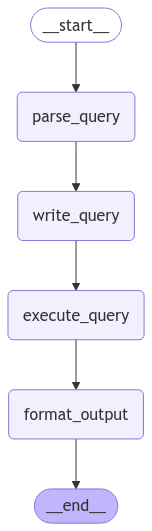

In [205]:
from IPython.display import Image, display
research_app = create_workflow()
display(Image(research_app.get_graph().draw_mermaid_png()))

In [206]:
def search_jobs(natural_query: str):
    graph = create_workflow()
    
    initial_state = {
        "natural_query": natural_query,
        "parsed_query": {},
        "sql": "",
        "results": "",
        "attempts": 0,
        "final_output": ""
    }
    
    result = graph.invoke(initial_state)
    
    # Debug final state
    print(f"Final state: {result}")
    
    return result["final_output"]

In [210]:
result = search_jobs("please find jobs openings for data engineer in usa")

if result["status"] == "success":
    df = pd.DataFrame(result["data"])
    df.head()
else:
    print(result["message"])

Raw response: content="```python\n{\n    'search_query': 'data engineer',\n    'location': 'usa'\n}\n```" additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 71, 'total_tokens': 93, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'cached_tokens': 0, 'audio_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'stop', 'logprobs': None} id='run-7ca8e102-dead-4070-9ed3-484a08800297-0' usage_metadata={'input_tokens': 71, 'output_tokens': 22, 'total_tokens': 93, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}
Parsed query: {'search_query': 'data engineer', 'location': 'usa'}
Raw SQL response: ```sql
SELECT * FROM JOBLISTINGS WHERE SEARCH_QUERY ILIKE '%data engineer%' AND LOCATION ILIKE '%usa%';
```
Fin

In [211]:
df = pd.DataFrame(result["data"])
df

,JOB_ID,SEARCH_QUERY,TITLE,COMPANY,LOCATION,DESCRIPTION,POSTED_AT,POSTED_DATE,APPLY_LINKS
0,27745ea4-b300-491b-bbe0-575060ab8332,data engineer,Data Engineer with Pharma Domain,Syntricate Technologies,"Thousand Oaks, CA",Data Engineer with Pharma Domain Thousand Oaks...,6 days ago,2024-11-18,Jooble: https://jooble.org/jdp/769579418351057...
1,1fc51551-8f6c-4e39-8c81-aa71be56cceb,data engineer,Data Engineer,Synaptein Solutions inc,"Thousand Oaks, CA",Company Description\n\nIT Solutions provider f...,1 day ago,2024-11-29,ZipRecruiter: https://www.ziprecruiter.com/c/S...
2,4fc8f66b-7353-445e-bbde-e2e8d94023e6,data engineer,Data Engineer with Pharma Domain,Syntricate Technologies,"Thousand Oaks, CA",Data Engineer with Pharma Domain\nThousand Oak...,2 days ago,2024-11-28,Jooble: https://jooble.org/jdp/769579418351057...
3,46d7ba7b-efd5-4ebc-80e6-f7e8dcbe4be0,data engineer,Data Engineer with Pharma Domain,Syntricate Technologies,"Thousand Oaks, CA",Data Engineer with Pharma Domain\nThousand Oak...,2 days ago,2024-11-28,Jooble: https://jooble.org/jdp/769579418351057...


# SQL agent 2

In [552]:
from typing import TypedDict, List, Dict
from langgraph.graph import StateGraph
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
import pandas as pd
import snowflake.connector
import ast

In [553]:
# Initialize LLM
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)


In [554]:

# TypedDict for Agent State
class AgentState(TypedDict):
    natural_query: str
    parsed_query: Dict[str, List[str]]
    sql: str
    results: str
    final_output: str

In [555]:
def parse_natural_query(state: AgentState) -> AgentState:
    parser_prompt = ChatPromptTemplate.from_messages([
        ("system", """You are an expert at parsing job search queries. Extract the column names 
        and their corresponding values based on the following schema map:
        {{
            "role": "SEARCH_QUERY",
            "job": "SEARCH_QUERY",
            "title": "TITLE",
            "company": "COMPANY",
            "location": "LOCATION",
            "description": "DESCRIPTION",
            "posted_date": "POSTED_DATE"
        }}

        Include relevant synonyms for each value from this synonym map:
        {{
            "SEARCH_QUERY": {{
                "data": [
                    "data", "data engineer", "data scientist", 
                    "data analyst", "data specialist", "data science", 
                    "data engineering", "data analytics"
                ],
                "data engineer": ["data engineer", "data engineering"],
                "data scientist": ["data scientist", "data science", "machine learning scientist"],
                "AI engineer": ["AI engineer", "artificial intelligence engineer"],
                "machine learning engineer": ["machine learning engineer", "ML engineer"],
                "data analyst": ["data analyst", "data analytics"],
                "AI/ML engineer": ["AI/ML engineer", "artificial intelligence/machine learning engineer"],
                "software engineer": ["software engineer", "software developer", "software programming"],
                "devops engineer": ["devops engineer", "site reliability engineer", "SRE"],
                "full stack engineer": ["full stack engineer", "full stack developer", "front end and back end developer"]
            }}
        }}

        Return a valid Python dictionary where:
        - Keys are column names from the schema map.
        - Values are lists of terms to search for, including synonyms.
        Format the output as valid Python syntax with no extra text or code blocks.
        Example: {{'column_name': ['value1', 'value2']}}"""),
        ("user", "Parse this job search query: {natural_query}")
    ])
    
    chain = parser_prompt | llm
    response = chain.invoke({
        "natural_query": state["natural_query"]
    })
    
    try:
        content = response.content if hasattr(response, 'content') else response
        print(f"Raw LLM response: {content}")
        
        sanitized_response = content.strip("```python").strip("```").strip()
        parsed = ast.literal_eval(sanitized_response)
        
        if isinstance(parsed, dict) and all(isinstance(v, list) for v in parsed.values()):
            state["parsed_query"] = parsed
        else:
            raise ValueError("Parsed query does not return valid lists of terms.")
    except Exception as e:
        state["parsed_query"] = {"error": f"Parsing error: {str(e)}"}
    
    print(f"Parsed query: {state['parsed_query']}")
    return state


In [556]:
def write_sql_query(state: AgentState) -> AgentState:
    conditions = []
    schema_to_table_map = {
        "role": "SEARCH_QUERY",
        "job": "SEARCH_QUERY",
        "title": "TITLE",
        "company": "COMPANY",
        "location": "LOCATION",
        "description": "DESCRIPTION",
        "posted_date": "POSTED_DATE"
    }
    
    # Consolidate and deduplicate conditions for fields mapping to the same column
    column_conditions = {}
    for schema_field, table_column in schema_to_table_map.items():
        terms = state["parsed_query"].get(schema_field, [])
        if terms:  # Only add conditions for non-empty terms
            if table_column not in column_conditions:
                column_conditions[table_column] = set()  # Use a set to avoid duplicates
            column_conditions[table_column].update(terms)  # Add terms to the set

    # Generate SQL WHERE clause
    for table_column, terms in column_conditions.items():
        if terms:  # Avoid empty conditions
            term_conditions = [f"{table_column} ILIKE '%{term}%'" for term in sorted(terms)]
            conditions.append(f"({' OR '.join(term_conditions)})")
    
    if conditions:
        where_clause = " AND ".join(conditions)
        sql_query = f"SELECT * FROM JOBLISTINGS WHERE {where_clause}"
    else:
        sql_query = "SELECT * FROM JOBLISTINGS"  # Default query if no conditions
    
    state["sql"] = sql_query
    print(f"Generated SQL: {state['sql']}")
    return state


In [557]:
# Execute Query
def execute_query(state: AgentState) -> AgentState:
    try:
        conn = snowflake.connector.connect(
            account=account,
            user=user,
            password=password,
            database=database,
            schema=schema,
            warehouse=warehouse
        )
        cursor = conn.cursor()
        cursor.execute(state["sql"])
        columns = [col[0] for col in cursor.description]
        results = cursor.fetchall()
        state["results"] = pd.DataFrame(results, columns=columns)
        cursor.close()
        conn.close()
    except Exception as e:
        state["results"] = f"Error: {str(e)}"
    return state

In [558]:
# Format Output
def format_output(state: AgentState) -> AgentState:
    if isinstance(state["results"], pd.DataFrame):
        state["final_output"] = {
            "status": "success",
            "parsed_query": state["parsed_query"],
            "data": state["results"].to_dict(orient="records"),
            "sql": state["sql"]
        }
    else:
        state["final_output"] = {
            "status": "error",
            "message": "No results found or error in query.",
            "parsed_query": state["parsed_query"]
        }
    return state

In [559]:

# Create Workflow
def create_workflow():
    workflow = StateGraph(AgentState)
    
    # Add nodes
    workflow.add_node("parse_query", parse_natural_query)
    workflow.add_node("write_query", write_sql_query)
    workflow.add_node("execute_query", execute_query)
    workflow.add_node("format_output", format_output)
    
    # Add edges
    workflow.add_edge("parse_query", "write_query")
    workflow.add_edge("write_query", "execute_query")
    workflow.add_edge("execute_query", "format_output")
    
    workflow.set_entry_point("parse_query")
    workflow.set_finish_point("format_output")
    
    return workflow.compile()

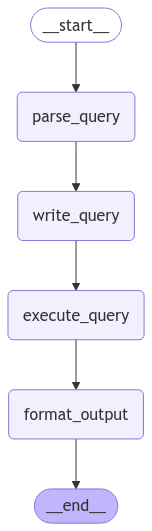

In [560]:
from IPython.display import Image, display
research_app = create_workflow()
display(Image(research_app.get_graph().draw_mermaid_png()))

In [561]:
def search_jobs(natural_query: str):
    graph = create_workflow()
    initial_state = {
        "natural_query": natural_query,
        "parsed_query": {},
        "sql": "",
        "results": "",
        "final_output": ""
    }
    try:
        result = graph.invoke(initial_state)
        return result["final_output"]
    except KeyError as e:
        print(f"Error: Missing variable - {str(e)}")
        return {"status": "error", "message": f"Missing variable in the process: {str(e)}"}

In [576]:
# Example Usage
result = search_jobs("Find me jobs in data engineering in California")
result

Raw LLM response: {
    "role": ["data engineer", "data engineering"],
    "job": ["data engineer", "data engineering"],
    "title": [],
    "company": [],
    "location": ["California"],
    "description": [],
    "posted_date": []
}
Parsed query: {'role': ['data engineer', 'data engineering'], 'job': ['data engineer', 'data engineering'], 'title': [], 'company': [], 'location': ['California'], 'description': [], 'posted_date': []}
Generated SQL: SELECT * FROM JOBLISTINGS WHERE (SEARCH_QUERY ILIKE '%data engineer%' OR SEARCH_QUERY ILIKE '%data engineering%') AND (LOCATION ILIKE '%California%')


{'status': 'success',
 'parsed_query': {'role': ['data engineer', 'data engineering'],
  'job': ['data engineer', 'data engineering'],
  'title': [],
  'company': [],
  'location': ['California'],
  'description': [],
  'posted_date': []},
 'data': [{'JOB_ID': 'd717eae0-47cb-4020-bb00-749115f860dd',
   'SEARCH_QUERY': 'data engineer',
   'TITLE': 'Data Engineer- Manager',
   'COMPANY': 'PRICE WATERHOUSE COOPERS',
   'LOCATION': 'California',
   'DESCRIPTION': 'At PwC, our people in data and analytics engineering focus on leveraging advanced technologies and techniques to design and develop robust data solutions for clients. They play a crucial role in transforming raw data into actionable insights, enabling informed decision-making and driving business growth. In data engineering at PwC, you will focus on designing and building data infrastructure and systems to enable efficient data processing and analysis. You will be responsible for developing and ...',
   'POSTED_AT': '3 days ago',

In [577]:
if result["status"] == "success":
    df = pd.DataFrame(result["data"])
    print(df)
else:
    print(result["message"])

                                 JOB_ID   SEARCH_QUERY  \
0  d717eae0-47cb-4020-bb00-749115f860dd  data engineer   

                    TITLE                   COMPANY    LOCATION  \
0  Data Engineer- Manager  PRICE WATERHOUSE COOPERS  California   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               DESCRIPTION  \
0  At PwC, our people in data and analytics engineering focus on leveraging advanced technologies and techniques to design and develop robust data solutions for clients. They play a crucial role in transforming raw data into actionable in

In [578]:
df = pd.DataFrame(result["data"])
df

,JOB_ID,SEARCH_QUERY,TITLE,COMPANY,LOCATION,DESCRIPTION,POSTED_AT,POSTED_DATE,APPLY_LINKS
0,d717eae0-47cb-4020-bb00-749115f860dd,data engineer,Data Engineer- Manager,PRICE WATERHOUSE COOPERS,California,"At PwC, our people in data and analytics engineering focus on leveraging advanced technologies and techniques to design and develop robust data solutions for clients. They play a crucial role in transforming raw data into actionable insights, enabling informed decision-making and driving business growth. In data engineering at PwC, you will focus on designing and building data infrastructure and systems to enable efficient data processing and analysis. You will be responsible for developing and ...",3 days ago,2024-11-21,Indeed: https://www.indeed.com/viewjob?jk=2c51dcc393047b01&utm_campaign=google_jobs_apply&utm_source=google_jobs_apply&utm_medium=organic | LinkedIn: https://www.linkedin.com/jobs/view/data-engineer-manager-at-pwc-4081544924?utm_campaign=google_jobs_apply&utm_source=google_jobs_apply&utm_medium=organic
